In [4]:
%pip install numpy pandas tensorflow scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# We train the computer using a large dataset of faces.

# FER-2013 i used because
# it contains thousands of face images
# Each image is labeled with an emotion
# Emotions are visible on the face
# Dataset is used only for learning, not for real users.

# Here the train folder is for to train the model like model learns the pattern and test is for the learning is done properly or not

In [4]:
train_dir = "C:\\Users\\DELL\\Downloads\\Face\\train"
test_dir = "C:\\Users\\DELL\\Downloads\\Face\\test"

IMG_SIZE = 48
BATCH_SIZE = 64

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=15
)

Epoch 1/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 680s 2s/step - accuracy: 0.2700 - loss: 1.7778 - val_accuracy: 0.3689 - val_loss: 1.6337
Epoch 2/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 48s 106ms/step - accuracy: 0.3755 - loss: 1.6033 - val_accuracy: 0.4295 - val_loss: 1.4775
Epoch 3/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 48s 107ms/step - accuracy: 0.4228 - loss: 1.4969 - val_accuracy: 0.4765 - val_loss: 1.3631
Epoch 4/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 48s 107ms/step - accuracy: 0.4511 - loss: 1.4283 - val_accuracy: 0.4840 - val_loss: 1.3352
Epoch 5/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 50s 112ms/step - accuracy: 0.4750 - loss: 1.3762 - val_accuracy: 0.5123 - val_loss: 1.2699
Epoch 6/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 58s 129ms/step - accuracy: 0.4894 - loss: 1.3450 - val_accuracy: 0.5279 - val_loss: 1.2339
Epoch 7/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 64s 142ms/step - accuracy: 0.5045 - loss: 1.3063 - val_accuracy: 0.5403 - val_loss: 1.2159
Epoch 8/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 84s 188ms/step - accuracy: 0.5106 - loss: 1.2

In [20]:
emotion_labels = list(train_data.class_indices.keys())

def predict_emotion_from_image(img_path):
    img = tf.keras.preprocessing.image.load_img(
        img_path, target_size=(48,48), color_mode="grayscale"
    )
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)[0]
    return dict(zip(emotion_labels, prediction))


In [22]:
def emotion_to_big_five(emotion_probs):

    O = (emotion_probs["surprise"] + emotion_probs["happy"]) / 2
    C = (emotion_probs["neutral"] + (1 - emotion_probs["angry"])) / 2
    E = (emotion_probs["happy"] + emotion_probs["surprise"]) / 2
    A = (emotion_probs["happy"] + (1 - emotion_probs["angry"])) / 2
    N = (emotion_probs["sad"] + emotion_probs["fear"] + emotion_probs["angry"]) / 3

    return {
        "Openness": round(O, 2),
        "Conscientiousness": round(C, 2),
        "Extraversion": round(E, 2),
        "Agreeableness": round(A, 2),
        "Neuroticism": round(N, 2)
    }


In [26]:
img_path = "C:\\Users\\DELL\\Downloads\\Face\\test\\happy\\PublicTest_9789737.jpg"

emotion_output = predict_emotion_from_image(img_path)
personality = emotion_to_big_five(emotion_output)

print("Emotion Prediction:")
for e, v in emotion_output.items():
    print(e, ":", round(v,2))

print("\nBig Five Personality Prediction:")
for t, s in personality.items():
    print(t, ":", s)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Emotion Prediction:
angry : 0.0
disgust : 0.0
fear : 0.0
happy : 1.0
neutral : 0.0
sad : 0.0
surprise : 0.0

Big Five Personality Prediction:
Openness : 0.5
Conscientiousness : 0.5
Extraversion : 0.5
Agreeableness : 1.0
Neuroticism : 0.0


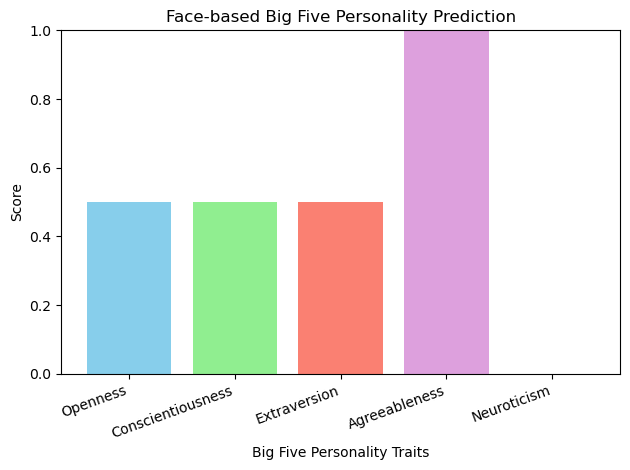

In [40]:
colors = ['skyblue', 'lightgreen', 'salmon', 'plum', 'orange']

plt.figure()
plt.bar(traits, scores, color=colors)

plt.xlabel("Big Five Personality Traits")
plt.ylabel("Score")
plt.title("Face-based Big Five Personality Prediction")

plt.xticks(rotation=20, ha='right')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()
